<a href="https://colab.research.google.com/github/AnalystGagan/Project-inteliQC/blob/master/inteliQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end machine-learning project for 🔎 quality control of ⚙️ mechanical component manufactured by casting process.

This notebook builds an End-to-end Binary Image Classifier using Tensorflow Hub.

## 1. Problem 
In the effort of replacing the manual visual inspection, we would like to automate this process with the help of AI solution.

Pass or Fail the component given an image of it.

## 2. Data 
The data we are using is from Kaggel - 
https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product

## 3. Evaluation 
The evaluation is a prediction accuracy of model on test dataset 

## 4. Features
Some information about the data:

* we are dealing with images (unstructured data ) so it is probably best to use deep learning/ transfer learning. 
* There are two classes of data which is defective/ok part(Pass/Fail)  
* There are around ~6633 images in training dataset
* There are around ~715 images in test dataset






### Getting our workspace ready 

* Import TensorFlow 2.x ✔️
* Import TensorFlow Hub ✔️
* Make sure we are using a GPU ✔️


In [3]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version :", tf.__version__)
print("TF Hub version:",hub.__version__)
 
# Check for GPU availablity 
print("GPU","available (Yessssssss!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version : 2.3.0
TF Hub version: 0.8.0
GPU available (Yessssssss!!!!)


## Getting our data ready (Turning into Tensors)

With all Machine Leanring models, our data has to be in numerical format. So that's what we will be doing first. Turning our images into Tensors(numerical representations)

Let's start by accessing our data and  creating the label data out of image names and save it in the form of .csv

In [4]:
import numpy as np 
import pandas as pd 

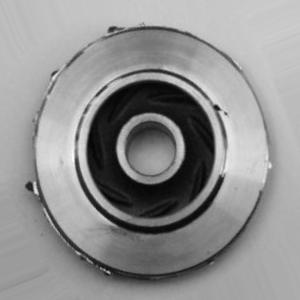

In [5]:
# Example of bad part 
from IPython.display import Image
Image("drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/def_front/cast_def_0_27.jpeg")

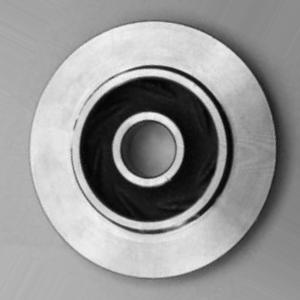

In [6]:
# Example of good part 
Image("drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/ok_front/cast_ok_0_29.jpeg")

In [7]:
# Create a function for label data maker

def label_data(path):
  """
  lebel_data function takes the file path object and convert it into idname object(filename of each image in file path object).
  """
  import os
  filepath = [os.path.join(path, file)
        for file in os.listdir(path)
        if file.endswith('.jpeg')]
  idname = []
  for i in filepath:
    file = os.path.basename(i)
    id = os.path.splitext(file)[0]
    idname.append(id)

  return idname
  

### Create training data labels
* create array of defective parts 
* create an array of ok parts 
* convert both arrays into dataframe 
* combine dataframes and shuffle them

In [8]:
# create array of label,defective part IDs
path = "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/def_front/"
notok = label_data(path)
notok[:5]

['cast_def_0_909',
 'cast_def_0_9449',
 'cast_def_0_9138',
 'cast_def_0_9753',
 'cast_def_0_9479']

In [9]:
# create array of label,ok part IDs
path = "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/ok_front/"
ok = label_data(path)
ok[:5]

['cast_ok_0_7402',
 'cast_ok_0_6552',
 'cast_ok_0_9591',
 'cast_ok_0_9740',
 'cast_ok_0_5372']

In [10]:
# Create a Dataframe of defective parts 
df_notok = pd.DataFrame(notok, columns=["imageID"])
df_notok["QCcheck"] = 'defective'
df_notok.head()

,imageID,QCcheck
0,cast_def_0_909,defective
1,cast_def_0_9449,defective
2,cast_def_0_9138,defective
3,cast_def_0_9753,defective
4,cast_def_0_9479,defective


In [11]:
# Create a Dataframe of defective parts 
df_ok = pd.DataFrame(ok, columns=["imageID"])
df_ok["QCcheck"] = 'ok'
df_ok.head()

,imageID,QCcheck
0,cast_ok_0_7402,ok
1,cast_ok_0_6552,ok
2,cast_ok_0_9591,ok
3,cast_ok_0_9740,ok
4,cast_ok_0_5372,ok


In [12]:
df_full_dataset = df_notok.append(df_ok)
df_full_dataset["QCcheck"].value_counts()

defective    3758
ok           2875
Name: QCcheck, dtype: int64

In [13]:
# shuffle rows in dataset
df_shuf = df_full_dataset.sample(frac=1).reset_index(drop=True)
df_shuf

,imageID,QCcheck
0,cast_def_0_2203,defective
1,cast_ok_0_7402,ok
2,cast_def_0_3766,defective
3,cast_def_0_7547,defective
4,cast_ok_0_4169,ok
...,...,...
6628,cast_ok_0_1933,ok
6629,cast_def_0_2024,defective
6630,cast_ok_0_487,ok
6631,cast_ok_0_7557,ok


In [14]:
# # Save label data as .csv
# df_shuf.to_csv(r'drive/My Drive/Project intelli-qc/label.csv', index = False)

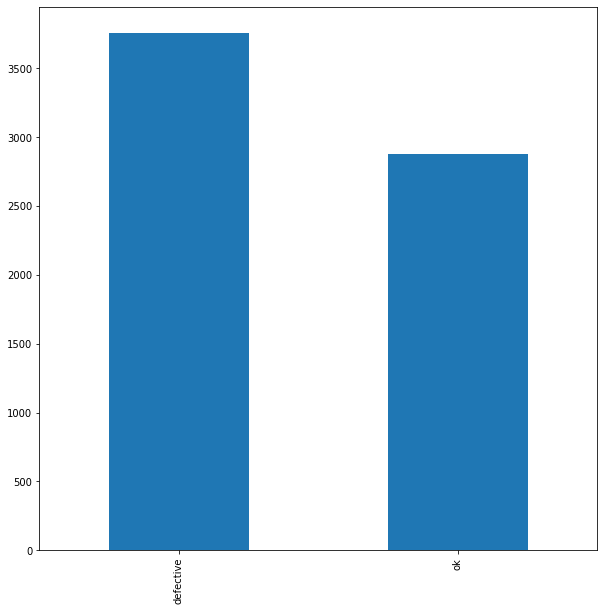

In [15]:
df_shuf['QCcheck'].value_counts().plot.bar(figsize=(10,10));

### Get all the training data in single folder 

In [16]:
# !rsync -a "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/def_front/" -d "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/"

In [17]:
# !rsync -a "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/ok_front/" -d "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/"

In [19]:
# let's check if all are copied 
path = "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/"
fulldata = label_data(path)
len(fulldata)

# 6633 are the coorect number of total image files

6633

In [20]:
# Reload the previously created label.csv dataset and created a unique label numpy array out of it
labeldf = pd.read_csv("drive/My Drive/Project intelli-qc/label.csv")
labels = labeldf["QCcheck"].to_numpy()
unique_qc_label = np.unique(labels)
unique_qc_label

array(['defective', 'ok'], dtype=object)

In [21]:
# Turn a single label into an array of boolens
labels[0]==unique_qc_label

array([False,  True])

In [22]:
# Tuen evey label into boolen array
boolen_labels = [label == unique_qc_label for label in labels]
boolen_labels[:5]

[array([False,  True]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False])]

In [23]:
# Example: Turing boolen array into integers
print(labels[0]) # Original label
print(np.where(unique_qc_label == labels[0])) # index where labels occurs
print(boolen_labels[0].argmax()) # index where label occurs in boolen array
print(boolen_labels[0].astype(int)) # there will be a 1 where the sample label occurs

ok
(array([1]),)
1
[0 1]


## Creating our own Validation set


Since, the dataset from kaggel does not come with a validation set, we are going to create our own

In [24]:
# Create an array of filepath for full training data 
import os
path = "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/"
filename = [os.path.join(path, file)
        for file in os.listdir(path)
        if file.endswith('.jpeg')]
filename[:5]

['drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/cast_ok_0_8568.jpeg',
 'drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/cast_ok_0_857.jpeg',
 'drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/cast_ok_0_8577.jpeg',
 'drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/cast_ok_0_8578.jpeg',
 'drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/cast_ok_0_8582.jpeg']

In [25]:
# Setup X and y variables
 
X = filename
y = boolen_labels

We are going to start off experimenting with ~663 images and increase as needed

In [26]:
# Set the number of images to use for experimenting 
NUM_IMAGES = 663 #@param {type:"slider", min:663, max:6633, step:663}

In [27]:
# Let's split our data into train and validation sets
from sklearn .model_selection import train_test_split
# np.random.seed(42)
# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42)
 
len(X_train), len(y_train), len(X_val), len(y_val)

(530, 530, 133, 133)

In [28]:
# lets have a look at training data
X_train[:2], y_train[:2]

(['drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/cast_ok_0_8618.jpeg',
  'drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_data/casting_data/train/full-training-set/cast_ok_0_9326.jpeg'],
 [array([ True, False]), array([False,  True])])

## Preprocessing Images (Turning Images into Tensors)

To preprocess our Images into Tensors . we're going to write a function which does a few things:

    1. Take the image filepath as input
    2. Use Tensorflow to read the file and save it to a variable, image
    3. Turn our image jpg into Tensors
    4. Resize the image to be a shape of (224,224)
    5. Return the modified image

Before we do, lets see what importing an image looks like.

In [29]:
# Convert Image to NumPy array 
from matplotlib.pyplot import imread
image = imread(filename[10])
image.shape
# Image is a combinatiomn of red,green and blue pixel values

(300, 300, 3)

In [30]:
image.max(), image.min()

(253, 0)

In [31]:
# Turn image into a Tensor
tf.constant(image)

<tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [169, 169, 169],
        [169, 169, 169],
        [169, 169, 169]],

       [[132, 132, 132],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [169, 169, 169],
        [169, 169, 169],
        [169, 169, 169]],

       [[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [169, 169, 169],
        [169, 169, 169],
        [169, 169, 169]],

       ...,

       [[152, 152, 152],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [194, 194, 194],
        [194, 194, 194],
        [194, 194, 194]],

       [[152, 152, 152],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [194, 194, 194],
        [194, 194, 194],
        [194, 194, 194]],

       [[151, 151, 151],
        [151, 151, 151],
        [150, 150, 150],
        ...,
        [194, 194, 19

Now, we have seen what an image looks like as a Tensor, let's make a function to preprocess them.

    1.Take the image filepath as input
    2.Use Tensorflow to read the file and save it to a variable, image
    3.Turn our image jpg into Tensors
    4.Normalize our image (convert color channel value from 0-253 to 0-1).
    5.Resize the image to be a shape of (224,224)
    6.Return the modified image



In [32]:
# Define image size
IMG_SIZE = 224
 
# Create a function to preprocess images 
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an Image file 
  image = tf.io.read_file(image_path)
  # Turn the Jpeg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-253 to 0-1 values 
  image = tf.image.convert_image_dtype(image, tf.float32) # data normalization
  # Resize the image to our desire value (224,224)
  image= tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
 
  return image

Now,Turning our data into batches

Why turn our data into batches

Let's say you are trying to process 10,000+ images in one go... they all might not fit into memory.

So that is why we do about 32 (this is the batch size) images at a time( you can manually adjust the batch size if need be).

https://twitter.com/ylecun/status/989610208497360896?s=20

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: (image, label)

In [33]:
# Create a simple function to return a tuple (image, label) 
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [34]:
# Demo of the above 
(process_image(X[10]), tf.constant(y[10]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5209034 , 0.5209034 , 0.5209034 ],
         [0.524895  , 0.524895  , 0.524895  ],
         [0.5293108 , 0.5293108 , 0.5293108 ],
         ...,
         [0.6594888 , 0.6594888 , 0.6594888 ],
         [0.6594888 , 0.6594888 , 0.6594888 ],
         [0.6594888 , 0.6594888 , 0.6594888 ]],
 
        [[0.5156513 , 0.5156513 , 0.5156513 ],
         [0.5196429 , 0.5196429 , 0.5196429 ],
         [0.5268208 , 0.5268208 , 0.5268208 ],
         ...,
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.6627451 , 0.6627451 , 0.6627451 ]],
 
        [[0.51039916, 0.51039916, 0.51039916],
         [0.51269794, 0.51269794, 0.51269794],
         [0.51824236, 0.51824236, 0.51824236],
         ...,
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.6627451 , 0.6627451 , 0.6627451 ]],
 
        ...,
 
        [[0.5949189 , 0.5949189 

Now, we have got a way to turn our data into tuple of Tensors in the form image, label. Let's make a function to turn all of our data (X& y) into batches


In [35]:
# Define a batch size , 32 is a good start 
BATCH_SIZE = 32
 
# Create a function to turn data into batches 
 
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it is training data but does not shuffle if it is validation data.
  Also, accepts test data as input (no lables)
  """
  # If data is a test dataset, we probably do not have labels 
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepath no label
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
 
  # if data is a valid dataset, we don't need to shuffle it 
  elif valid_data: 
    print(" Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths 
                                               tf.constant(y))) #lables
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)  
    return data_batch
  else: 
    print("Creating training data batches.... ")
    # Turn filepath and label into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
 
    # Shuffeling pathname nad labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(X)) 
 
    # Create (image, label) tuples (this also turns the images path into a preprocessed image) 
    data = data.map(get_image_label)   
 
    # Turn the training data into batches 
    data_batch = data.batch(BATCH_SIZE)
           
    return data_batch

In [36]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True )

Creating training data batches.... 
 Creating validation data batches...


In [37]:
# Check out the different attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data in now in batches , however these can be a little hard to understand/ comprehend , Let's visualize them 

In [41]:
import matplotlib.pyplot as plt
 
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure 
  plt.figure(figsize =(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
  # Create subplots (5 rows, 5 columns)
   ax = plt.subplot(5,5,i+1)
  # Display an image 
   plt.imshow(images[i])
  # Add the image label as the tile 
   plt.title(unique_qc_label[labels[i].argmax()])
  # Turn the grid lines off
   plt.axis("off")

In [42]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

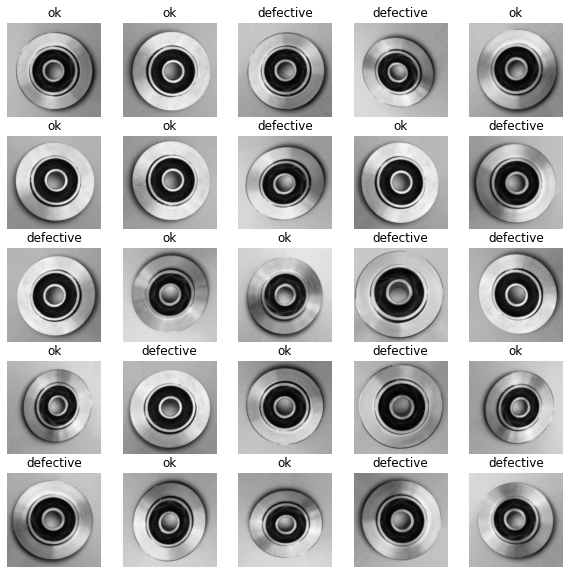

In [43]:
# Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

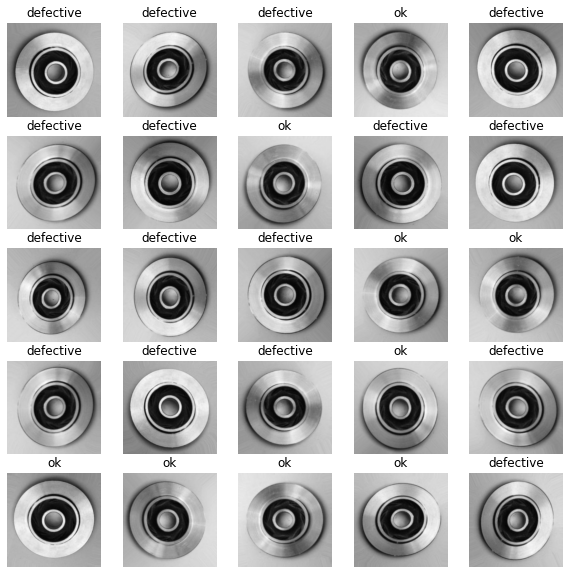

In [44]:
# Now let's visualize our valuization set 
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images, val_labels)